# HR DATA

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
hr_data = pd.read_excel(r'HR_Employee_Data.xlsx')

In [69]:
hr_data.head()


,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,satisfaction_pct,satisfaction_bin
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low,38.0,30-39%
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium,80.0,80-89%
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium,11.0,10-19%
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low,72.0,70-79%
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low,37.0,30-39%


In [70]:
hr_data.min()

Emp_Id                   IND01
satisfaction_level        0.09
last_evaluation           0.36
number_project               2
average_montly_hours        96
time_spend_company           2
Work_accident                0
left                         0
promotion_last_5years        0
Department                  IT
salary                    high
satisfaction_pct           9.0
satisfaction_bin          0-9%
dtype: object

In [23]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


## Employee Satisfaction Distribution

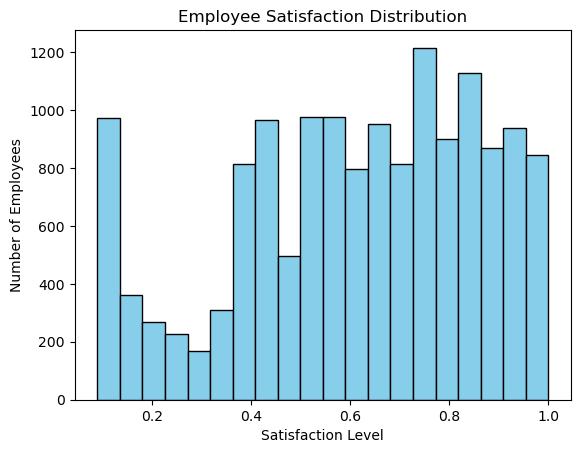

In [24]:
plt.hist(hr_data['satisfaction_level'], bins=20, color='skyblue', edgecolor='black')
plt.title('Employee Satisfaction Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Employees')
plt.show()


## Average Monthly Hours vs. Left (Turnover)

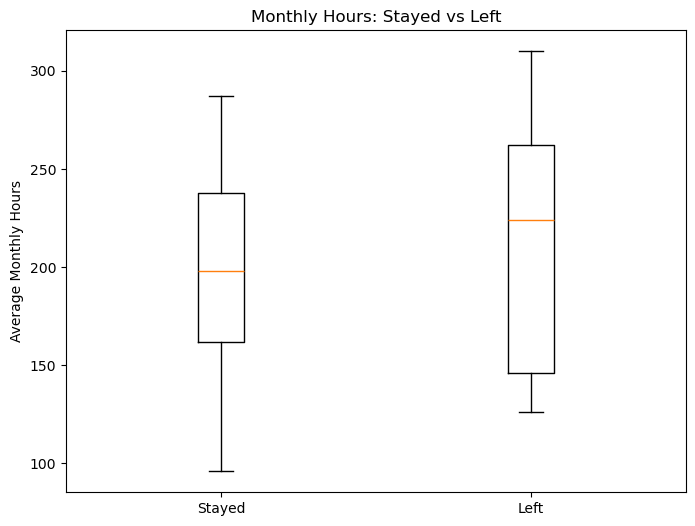

In [40]:
plt.figure(figsize=(8,6))
plt.boxplot([hr_data[hr_data['left'] == 0]['average_montly_hours'],
             hr_data[hr_data['left'] == 1]['average_montly_hours']],
            tick_labels=['Stayed', 'Left'])
plt.title('Monthly Hours: Stayed vs Left')
plt.ylabel('Average Monthly Hours')
plt.show()


## Employees per Department

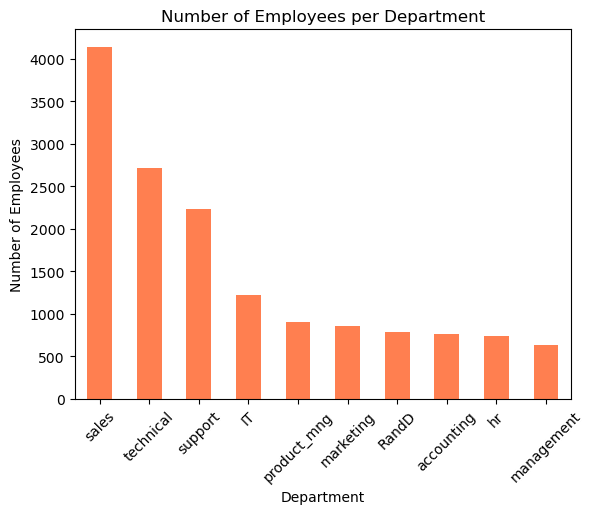

In [28]:
dept_counts = hr_data['Department'].value_counts()
dept_counts.plot(kind='bar', color='coral')
plt.title('Number of Employees per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


# Salary vs Exit


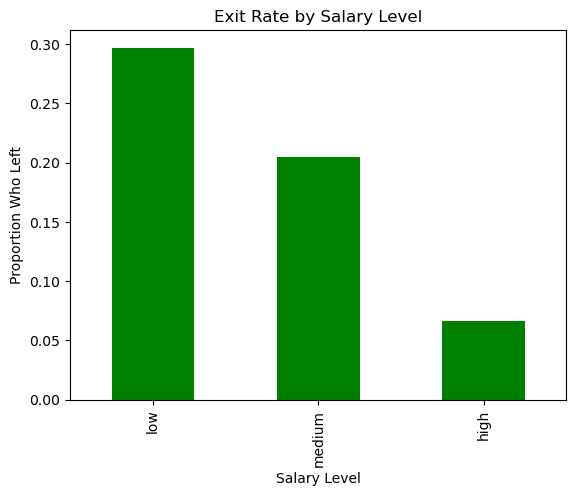

In [59]:
exit_by_salary = hr_data.groupby('salary')['left'].mean().sort_values(ascending=False)
exit_by_salary.plot(kind='bar', color='green')
plt.title('Exit Rate by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Proportion Who Left')
plt.show()


# Satisfaction by Salary

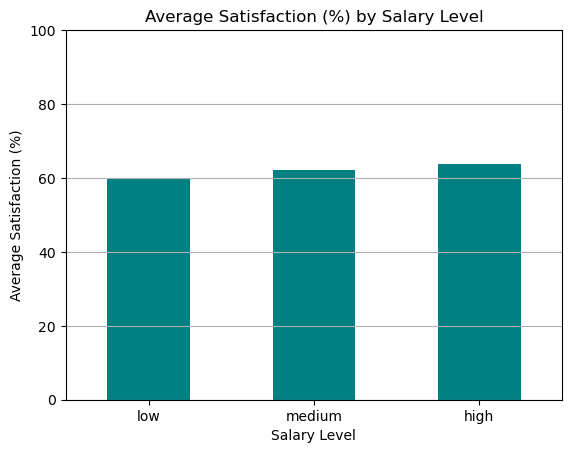

In [43]:
hr_data['satisfaction_pct'] = hr_data['satisfaction_level'] * 100

# Group by salary and get mean satisfaction
salary_order = ['low', 'medium', 'high']
avg_satisfaction_pct = hr_data.groupby('salary')['satisfaction_pct'].mean().loc[salary_order]

# Plot
avg_satisfaction_pct.plot(kind='bar', color='teal')
plt.title('Average Satisfaction (%) by Salary Level')
plt.xlabel('Average Salary Level')
plt.ylabel('Average Satisfaction (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Average Promotion per Employee

Average promotions in last 5 years per employee: 0.0213
That is approximately 2.13% of employees.


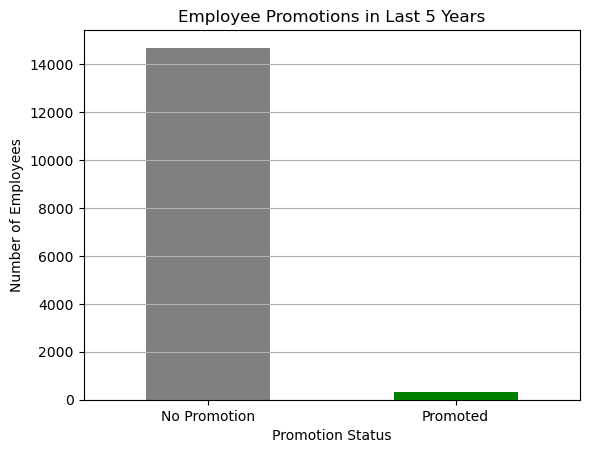

In [46]:
average_promotion = hr_data['promotion_last_5years'].mean()
print(f"Average promotions in last 5 years per employee: {average_promotion:.4f}")
print(f"That is approximately {average_promotion * 100:.2f}% of employees.")

promotion_counts = hr_data['promotion_last_5years'].value_counts().sort_index()
labels = ['No Promotion', 'Promoted']

promotion_counts.plot(kind='bar', color=['gray', 'green'])
plt.title('Employee Promotions in Last 5 Years')
plt.xlabel('Promotion Status')
plt.ylabel('Number of Employees')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)
plt.grid(axis='y')
plt.show()


## Department with highest Promotion Rate by Salary 

Department with highest promotion rate: management (10.95%)

Promotion rates in management department by salary:
  Low salary: 3.89%
  Medium salary: 7.56%
  High salary: 20.00%


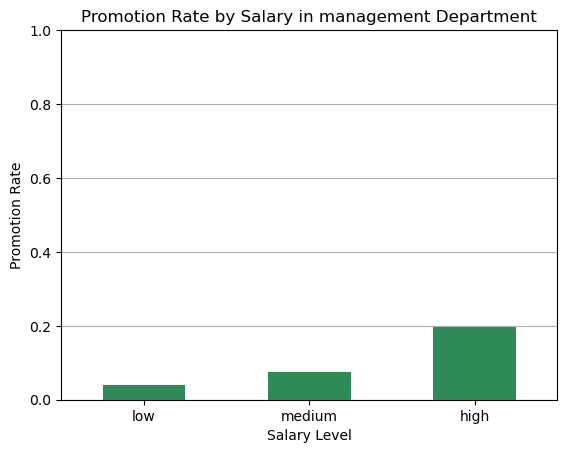

In [48]:
dept_promotion_rates = hr_data.groupby('Department')['promotion_last_5years'].mean()

# Find department with highest promotion rate
top_dept = dept_promotion_rates.idxmax()
top_rate = dept_promotion_rates.max()

print(f"Department with highest promotion rate: {top_dept} ({top_rate:.2%})")

top_dept_data = hr_data[hr_data['Department'] == top_dept]

# Group by salary level and calculate mean promotion rate
salary_promotion_in_dept = top_dept_data.groupby('salary')['promotion_last_5years'].mean()

# Sort salary levels to show them in order
salary_order = ['low', 'medium', 'high']
salary_promotion_in_dept = salary_promotion_in_dept.loc[salary_order]

# Display result
print(f"\nPromotion rates in {top_dept} department by salary:")
for level in salary_order:
    rate = salary_promotion_in_dept.get(level, 0)
    print(f"  {level.capitalize()} salary: {rate:.2%}")

    
# Plot
salary_promotion_in_dept.plot(kind='bar', color='seagreen')
plt.title(f'Promotion Rate by Salary in {top_dept} Department')
plt.xlabel('Salary Level')
plt.ylabel('Promotion Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

## Promotion rate for Sales per Salary

Promotion rate in the Sales department: 2.42%

Promotion rates in Sales department by salary level:
  Low salary: 0.95%
  Medium salary: 3.84%
  High salary: 4.46%


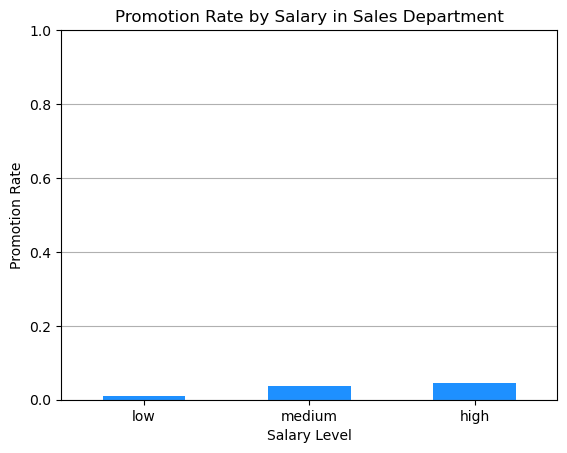

In [51]:
# Filter data for Sales department
sales_data = hr_data[hr_data['Department'] == 'sales']

# Calculate the promotion rate in Sales
sales_promotion_rate = sales_data['promotion_last_5years'].mean()
print(f"Promotion rate in the Sales department: {sales_promotion_rate:.2%}")

# Group by salary level and calculate mean promotion rate
sales_promotion_by_salary = sales_data.groupby('salary')['promotion_last_5years'].mean()

# Sort salary levels for clear display
salary_order = ['low', 'medium', 'high']
sales_promotion_by_salary = sales_promotion_by_salary.loc[salary_order]

# Display the results
print("\nPromotion rates in Sales department by salary level:")
for level in salary_order:
    rate = sales_promotion_by_salary.get(level, 0)
    print(f"  {level.capitalize()} salary: {rate:.2%}")

# Plot
sales_promotion_by_salary.plot(kind='bar', color='dodgerblue')
plt.title('Promotion Rate by Salary in Sales Department')
plt.xlabel('Salary Level')
plt.ylabel('Promotion Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Exit rate by Satisfaction

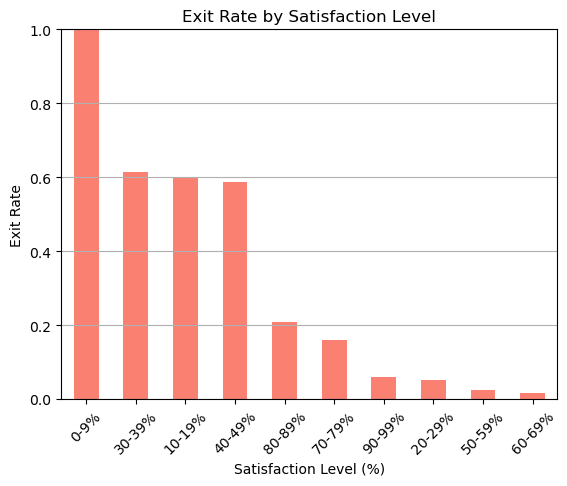

In [60]:
hr_data['satisfaction_pct'] = hr_data['satisfaction_level'] * 100

# Create bins for satisfaction levels to group data (e.g., intervals of 10%)
bins = np.arange(0, 110, 10)
labels = [f"{i}-{i+9}%" for i in bins[:-1]]  # e.g., 0-9%, 10-19%, etc.

# Group by satisfaction level range and calculate exit rate (mean of 'left')
hr_data['satisfaction_bin'] = pd.cut(hr_data['satisfaction_pct'], bins=bins, labels=labels, right=False)
exit_rate_by_satisfaction = hr_data.groupby('satisfaction_bin', observed=False)['left'].mean().sort_values(ascending=False)

# Plot
exit_rate_by_satisfaction.plot(kind='bar', color='salmon')
plt.title('Exit Rate by Satisfaction Level')
plt.xlabel('Satisfaction Level (%)')
plt.ylabel('Exit Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

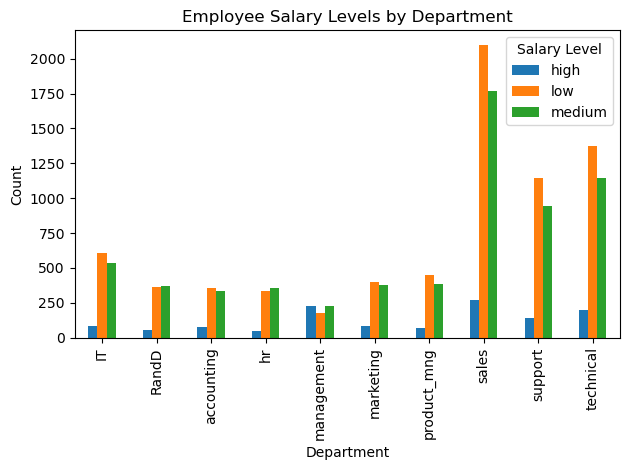

In [62]:
#counts is a combination of department and salary
counts = hr_data.groupby(["Department", "salary"]).size().unstack(fill_value=0)

#plot
counts.plot(kind="bar", stacked=False)
plt.title("Employee Salary Levels by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Salary Level")
plt.tight_layout()
plt.show()#count plot

* "Som säljare vill jag förstå både kunden – och teamet bakom försäljningen."
Databerättelse som säljare.


1. De som lämnar oss är ofta de som är minst nöjda
 Låg nöjdhet → hög avgång
1.1 Vi analyserade kopplingen mellan medarbetarnas nöjdhet och om de lämnar företaget.
1.2 Ju lägre satisfaction level, desto fler slutar.
1.3 Störst avgång i spannet under 40% nöjdhet.

2. Säljavdelningen får inte många befordringar
 När vi tittade på befordringar (promotion_last_5years) såg vi att säljavdelningen hade relativt låg befordringsfrekvens, särskilt bland dem med lägre lön.
2.1 Låg befordringsfrekvens i försäljning
2.2 Få inom "sales" har fått befordran senaste 5 åren.
2.3 Särskilt lågt bland de med låg lön.

3. Högre lön = Högre nöjdhet?
 När vi jämförde lön med nöjdhet såg vi en trend: medarbetare med högre lön var generellt mer nöjda.
3.1 Högre lön → högre nöjdhet
3.2 Anställda med hög lön har i snitt klart högre satisfaction level.

Slutsats
Om vi vill sälja bättre – måste vi också ta hand om våra egna bättre.
1. Identifiera och stötta låg-nöjda teammedlemmar.
2. Utvärdera befordringsmöjligheter i sälj.
3. Se över lönestrukturer som verktyg för att öka trivsel och lojalitet.